In [1]:
!pip install pandas networkx matplotlib


import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities



In [ ]:
# Sample edge list (make sure relationships are meaningful for connected graph)
data = {
    'From': ['California', 'California', 'Texas', 'Texas', 'New York', 'Florida', 'Georgia'],
    'To': ['Nevada', 'Oregon', 'Louisiana', 'New Mexico', 'New Jersey', 'Georgia', 'South Carolina']
}
df = pd.DataFrame(data)
df.head()




,From,To
0,California,Nevada
1,California,Oregon
2,Texas,Louisiana
3,Texas,New Mexico
4,New York,New Jersey


In [4]:
# Create a graph from the edge list
us_graph = nx.from_pandas_edgelist(df, source="From", target="To")

# Add more edges to strengthen connectivity
us_graph.add_edges_from([
    ("California", "Arizona"), ("California", "Utah"),
    ("New York", "California"), ("Texas", "California"),
    ("Georgia", "New York"), ("Florida", "Texas"),
    ("Florida", "California"), ("Georgia", "Florida")
])


# Check if the graph is connected
if nx.is_connected(us_graph.to_undirected()):
    print("The graph is connected!")
else:
    print("The graph is not connected!")


The graph is connected!


In [5]:
communities = greedy_modularity_communities(us_graph)
print("Detected communities:", communities)

# Map nodes to communities
node_to_community = {}
for i, community in enumerate(communities):
    for node in community:
        node_to_community[node] = i

node_colors = [node_to_community[node] for node in us_graph.nodes()]


Detected communities: [frozenset({'Georgia', 'South Carolina', 'Florida', 'New Jersey', 'New York'}), frozenset({'California', 'Arizona', 'Utah', 'Oregon', 'Nevada'}), frozenset({'New Mexico', 'Louisiana', 'Texas'})]


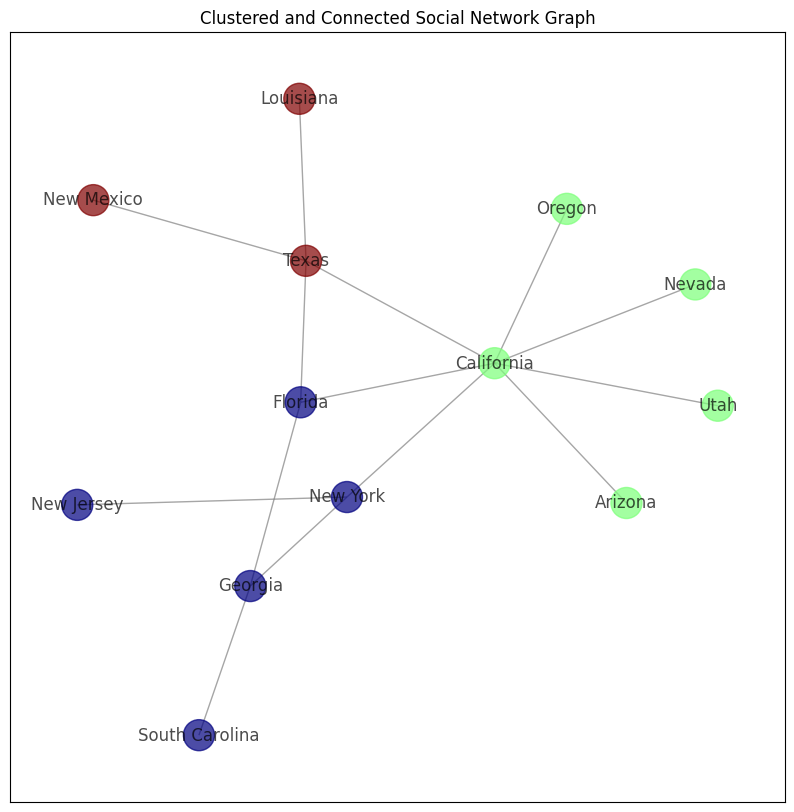

In [6]:
pos = nx.kamada_kawai_layout(us_graph)

plt.figure(figsize=(10, 10))
nx.draw_networkx(
    us_graph, pos, with_labels=True, node_size=500, node_color=node_colors,
    cmap=plt.cm.jet, font_size=12, edge_color='gray', alpha=0.7
)
plt.title("Clustered and Connected Social Network Graph")
plt.show()


In [7]:
print("Node degrees:")
print(dict(us_graph.degree()))
print("Degree Centrality:", nx.degree_centrality(us_graph))
print("Eigenvector Centrality:", nx.eigenvector_centrality(us_graph))
print("Betweenness Centrality:", nx.betweenness_centrality(us_graph))
df.to_csv('us_edgelist.csv', index=False)
print("Edge list saved as 'us_edgelist.csv'")


Node degrees:
{'California': 7, 'Nevada': 1, 'Oregon': 1, 'Texas': 4, 'Louisiana': 1, 'New Mexico': 1, 'New York': 3, 'New Jersey': 1, 'Florida': 3, 'Georgia': 3, 'South Carolina': 1, 'Arizona': 1, 'Utah': 1}
Degree Centrality: {'California': 0.5833333333333333, 'Nevada': 0.08333333333333333, 'Oregon': 0.08333333333333333, 'Texas': 0.3333333333333333, 'Louisiana': 0.08333333333333333, 'New Mexico': 0.08333333333333333, 'New York': 0.25, 'New Jersey': 0.08333333333333333, 'Florida': 0.25, 'Georgia': 0.25, 'South Carolina': 0.08333333333333333, 'Arizona': 0.08333333333333333, 'Utah': 0.08333333333333333}
Eigenvector Centrality: {'California': 0.5898114553729935, 'Nevada': 0.1887111743239959, 'Oregon': 0.1887111743239959, 'Texas': 0.395966861210086, 'Louisiana': 0.12668993927345285, 'New Mexico': 0.12668993927345285, 'New York': 0.2982333808751665, 'New Jersey': 0.09542118575379367, 'Florida': 0.39439261461668323, 'Georgia': 0.2468822338538669, 'South Carolina': 0.07899150101931102, 'Ariz